## Treść

Napisz program symulujący spacer losowy i zliczający moment pierwszego powrotu do punktu początkowego; przeprowadź 1000 symulacji – jak wygląda ten rozkład? czy program zawsze kończy swoje działanie, tzn. czy zawsze następuje powrót do punktu 0?

In [1]:
# IMPORTS
import random as r
import collections as c
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# CONSTANTS
REPEATS = 1_000
STEPS_LIMIT = 200

In [3]:
def do_step() -> int:
    return -1 if r.random() < 0.5 else 1

In [4]:
def simulation() -> int:
    lantern = 0
    lantern += do_step()
    step = 1
    
    while lantern != 0 and step < STEPS_LIMIT:
        lantern += do_step()
        step += 1
        
    return step

In [5]:
# MAIN LOOP
steps = c.Counter()
for _ in range(REPEATS):
    steps[simulation()] += 1

In [6]:
for i in range(1, STEPS_LIMIT):
        if i not in steps:
            steps[i] = 0
    
steps_prob = [(x, amount / REPEATS) for x, amount in steps.items()]
steps_prob.sort(key=lambda t: t[0])
x, y = zip(*steps_prob)

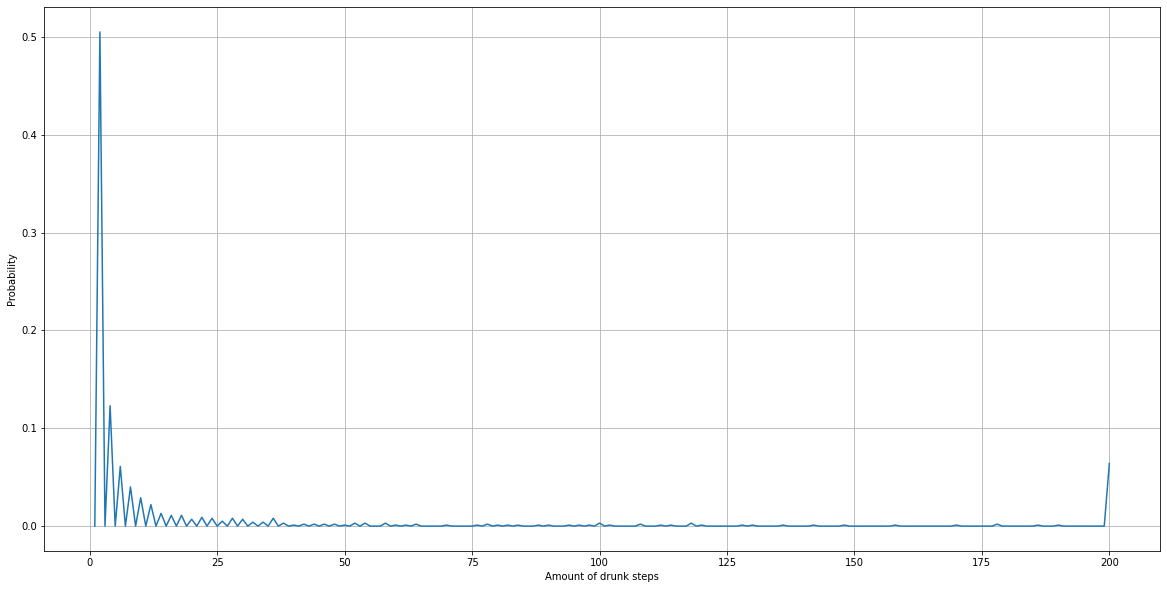

In [7]:
plt.rcParams['figure.figsize'] = [20, 10]

ax = plt.gca()
ax.set_xlabel('Amount of drunk steps')
ax.set_ylabel('Probability')

plt.plot(x, y)
plt.grid()
plt.show()

### Autor

Marek Grzelak